In [16]:
import pandas as pd
import numpy as np

In [17]:
book = pd.read_csv("E:/Freelance Projects/Coding with Jupeter Notebook for Data Science assignment/8. Recommendation System/book.csv")

In [18]:
book.head()

,Unnamed: 0,User.ID,Book.Title,Book.Rating
0,1,276726,Classical Mythology,5
1,2,276729,Clara Callan,3
2,3,276729,Decision in Normandy,6
3,4,276736,Flu: The Story of the Great Influenza Pandemic...,8
4,5,276737,The Mummies of Urumchi,6


#### Count vectorizer

In [39]:
#Lets vectorize all these titles
from sklearn.feature_extraction.text import CountVectorizer

#initialize vectorizer
vect = CountVectorizer(analyzer = 'word', ngram_range = (1,2), stop_words = 'english', min_df = 0.002) #min_df = rare words, max_df = most used words
#ngram_range = (1,2) - if used more than  1(value), lots of features or noise

#Fit into the title
vect.fit(book['Book.Title'])
title_matrix = vect.transform(book['Book.Title'])
title_matrix.shape

(10000, 281)

The total no. of features we could extract are 281 due to min_df threshold we applied.

In [40]:
#Lets find vocabulary/features
features = vect.get_feature_names()
features

C:\Users\proyas.bose\Anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


['101',
 'adventure',
 'adventures',
 'age',
 'america',
 'american',
 'american romance',
 'amp',
 'angel',
 'angels',
 'art',
 'autobiography',
 'avon',
 'baby',
 'bad',
 'ballantine',
 'ballantine reader',
 'bantam',
 'beauty',
 'best',
 'big',
 'black',
 'blood',
 'blue',
 'body',
 'book',
 'book club',
 'books',
 'boy',
 'bride',
 'brothers',
 'case',
 'cat',
 'century',
 'chicken',
 'chicken soup',
 'child',
 'children',
 'christmas',
 'chronicles',
 'circle',
 'city',
 'classic',
 'classics',
 'club',
 'collection',
 'complete',
 'confessions',
 'contemporaries',
 'contemporary',
 'cookbook',
 'country',
 'crime',
 'dance',
 'dark',
 'das',
 'daughter',
 'day',
 'dead',
 'death',
 'del',
 'der',
 'des',
 'desire',
 'devil',
 'diary',
 'die',
 'dog',
 'dogs',
 'don',
 'dover',
 'dover thrift',
 'dragon',
 'dream',
 'dreams',
 'dress',
 'du',
 'earth',
 'easy',
 'edition',
 'editions',
 'el',
 'en',
 'end',
 'eye',
 'fall',
 'family',
 'father',
 'fiction',
 'forever',
 'friends',

In [41]:
from sklearn.metrics.pairwise import cosine_similarity
cosine_sim_titles = cosine_similarity(title_matrix, title_matrix)
cosine_sim_titles.shape

(10000, 10000)

In [43]:
#Get books which are similar to a given title
title_id = 100
book['Book.Title'].iloc[title_id]

"Prize Stories, 1987: The O'Henry Awards"

In [44]:
#Find out what features have been considered  by the vectorizer for a given title ?
feature_array = np.squeeze(title_matrix[title_id].toarray()) #squeeze activity matrix into array
idx = np.where(feature_array > 0)
idx[0]
[features[x] for x in idx[0]]

['stories']

In [45]:
# Find index of feature
idx[0]

array([232], dtype=int64)

In [46]:
#Cosine similarity with other similar titles
n = 15 #how many books to be recommended
top_n_idx = np.flip(np.argsort(cosine_sim_titles[title_id,]), axis = 0)[0:n]
top_n_sim_values = cosine_sim_titles[title_id, top_n_idx]
top_n_sim_values

array([1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.])

In [48]:
#find top n with values > 0
top_n_idx = top_n_idx[top_n_sim_values > 0]
#Matching books
book['Book.Title'].iloc[top_n_idx]

9793                          Circling the Drain: Stories
9900    The Call of Stories : Teaching and the Moral I...
1158    Slippage: Previously Poised, Previously Uncoll...
9097                        Bloodchild: And Other Stories
2312      Dirty Jokes and Beer : Stories of the Unrefined
7600                 The Bloody Chamber and Other Stories
5490                   Werewolves in Their Youth: Stories
1334    My Grandfathers Blessings : Stories of Strengt...
9818                         MY DATE WITH SATAN : Stories
6967    At the Manger: The Stories of Those Who Were T...
6898                               The Lilac Bus: Stories
8901                The Collected Stories of Eudora Welty
4118                              The Stories of Eva Luna
7011                 The Real Thing: Stories and Sketches
5818     Barrel Fever : Stories and Essays (Barrel Fever)
Name: Book.Title, dtype: object

In [49]:
# Above code in a function
def return_sim_books(title_id, title_matrix, vectorizer, top_n = 10):
    
    # generate sim matrix
    sim_matrix = cosine_similarity(title_matrix, title_matrix)
    features = vectorizer.get_feature_names()

    top_n_idx = np.flip(np.argsort(sim_matrix[title_id,]),axis=0)[0:top_n]
    top_n_sim_values = sim_matrix[title_id, top_n_idx]
    
    # find top n with values > 0
    top_n_idx = top_n_idx[top_n_sim_values > 0]
    scores = top_n_sim_values[top_n_sim_values > 0]
    
    
    # find features from the vectorized matrix
    sim_books_idx = book['Book.Title'].iloc[top_n_idx].index
    words = []
    for book_idx in sim_books_idx:
        try:
            feature_array = np.squeeze(title_matrix[book_idx,].toarray())
        except:
            feature_array = np.squeeze(title_matrix[book_idx,])
        idx = np.where(feature_array > 0)
        words.append([" , ".join([features[i] for i in idx[0]])])
        
    # collate results
    res = pd.DataFrame({"book_title" : book['Book.Title'].iloc[title_id],
           "sim_books": book['Book.Title'].iloc[top_n_idx].values,"words":words,
           "scores":scores}, columns = ["book_title","sim_books","scores","words"])
    
    
    return res

In [50]:
vect = CountVectorizer(analyzer='word',ngram_range=(1,2),stop_words='english', min_df = 0.001)
vect.fit(book['Book.Title'])
title_matrix = vect.transform(book['Book.Title'])
print(book['Book.Title'][10])
return_sim_books(10,title_matrix,vect,top_n=10)

Nights Below Station Street


,book_title,sim_books,scores,words
0,Nights Below Station Street,Nights Below Station Street,1.000000,"[nights , street]"
1,Nights Below Station Street,Eureka Street,0.707107,[street]
2,Nights Below Station Street,Nights in the Gardens of Spain,0.707107,[nights]
3,Nights Below Station Street,Nights in Rodanthe,0.707107,[nights]
4,Nights Below Station Street,Candles on Bay Street,0.707107,[street]
5,Nights Below Station Street,The Street Lawyer,0.707107,[street]
6,Nights Below Station Street,The Street Lawyer,0.707107,[street]
7,Nights Below Station Street,The Cater Street Hangman,0.707107,[street]
8,Nights Below Station Street,11 Edward Street,0.707107,[street]
9,Nights Below Station Street,Jasmine Nights,0.707107,[nights]


### Also recommended to which User

In [19]:
book.drop("Unnamed: 0",axis = 1,inplace = True)

In [20]:
book.shape

(10000, 3)

In [21]:
highest_number_of_rating = book.groupby('Book.Title')[['Book.Title']].count()
highest_number_of_rating

,Book.Title
Book.Title,
"Jason, Madison &amp",1
Other Stories;Merril;1985;McClelland &amp,1
Repairing PC Drives &amp,1
'48,1
'O Au No Keia: Voices from Hawai'I's Mahu and Transgender Communities,1
...,...
"\Surely You're Joking, Mr. Feynman!\: Adventures of a Curious Character",1
"\Well, there's your problem\: Cartoons",1
iI Paradiso Degli Orchi,1


In [24]:
# List of 10 movies with high number of ratings
highest_number_of_rating = highest_number_of_rating.nlargest(10, 'Book.Title')
highest_number_of_rating

,Book.Title
Book.Title,
Fahrenheit 451,5
Charlie and the Chocolate Factory,4
Ender's Game (Ender Wiggins Saga (Paperback)),4
Stardust,4
"The Amber Spyglass (His Dark Materials, Book 3)",4
"The Subtle Knife (His Dark Materials, Book 2)",4
Vanished,4
Cold Sassy Tree,3
High Fidelity,3


In [25]:
table = book.pivot_table(index='Book.Title', columns='User.ID', values='Book.Rating')
table

User.ID,8,9,10,12,14,16,17,19,22,26,...,278831,278832,278836,278843,278844,278846,278849,278851,278852,278854
Book.Title,,,,,,,,,,,,,,,,,,,,,
"Jason, Madison &amp",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Other Stories;Merril;1985;McClelland &amp,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Repairing PC Drives &amp,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
'48,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
'O Au No Keia: Voices from Hawai'I's Mahu and Transgender Communities,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
"\Surely You're Joking, Mr. Feynman!\: Adventures of a Curious Character",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
"\Well, there's your problem\: Cartoons",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
iI Paradiso Degli Orchi,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,7.0,NaN,NaN


<AxesSubplot:>

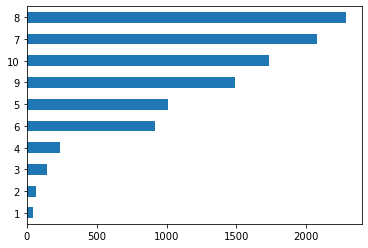

In [27]:
book['Book.Rating'].value_counts().sort_values().plot(kind='barh')

In [28]:
from scipy.sparse import csr_matrix
from  sklearn.neighbors import NearestNeighbors

In [29]:
table = table.fillna(0)

In [30]:
matrix = csr_matrix(table.values)

In [31]:
matrix

<9659x2182 sparse matrix of type '<class 'numpy.float64'>'
	with 9993 stored elements in Compressed Sparse Row format>

In [32]:
from sklearn.metrics.pairwise import linear_kernel

In [33]:
cosine = linear_kernel(matrix, matrix)
cosine

array([[64., 48., 32., ...,  0.,  0.,  0.],
       [48., 36., 24., ...,  0.,  0.,  0.],
       [32., 24., 16., ...,  0.,  0.,  0.],
       ...,
       [ 0.,  0.,  0., ..., 49.,  0.,  0.],
       [ 0.,  0.,  0., ...,  0., 25.,  0.],
       [ 0.,  0.,  0., ...,  0.,  0., 16.]])

we are randomly choosing a book tiltle to get recommendations for that specific book.

In [36]:
user_query_index = np.random.choice(table.shape[1])
user_query_index

1374

In [38]:
table.index[user_query_index]

'Children of God (Ballantine Readers Circle)'

In [34]:
def recommendations(title):
    idx = user_query_index
    print(idx)
    scores = list(enumerate(cosine[idx]))
    scores = sorted(scores, key=lambda x: x[1], reverse=True)
    scores = scores[1:5]
    print(scores)
    movie_indices = [i[0] for i in scores]
    print(movie_indices)
    return table.iloc[movie_indices]

In [37]:
recommendations(table.index[user_query_index])

1374
[(694, 72.0), (3011, 72.0), (4880, 72.0), (5689, 72.0)]
[694, 3011, 4880, 5689]


User.ID,8,9,10,12,14,16,17,19,22,26,...,278831,278832,278836,278843,278844,278846,278849,278851,278852,278854
Book.Title,,,,,,,,,,,,,,,,,,,,,
At Bertram's Hotel,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
Granta 59: France the Outsider (Granta (Viking)),0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
My Year of Meats,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
Ravelstein,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
